# **Importing The Dependencies**

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **Exploratory Data Analysis**



In [3]:
mail_df=pd.read_csv('/content/mail_data.csv')

In [4]:
mail_df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_df.isnull().sum()

,0
Category,0
Message,0


<Axes: xlabel='count', ylabel='Category'>

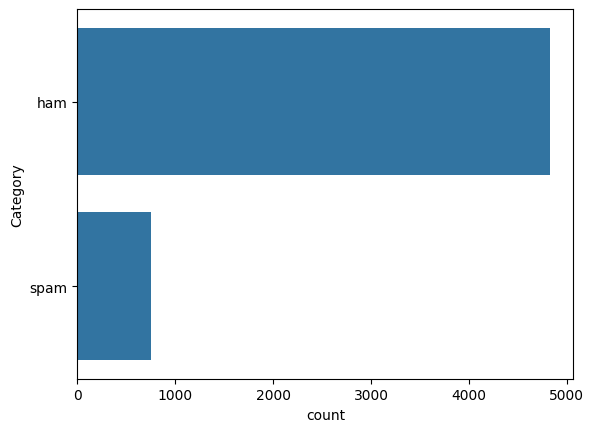

In [6]:
sns.countplot(mail_df['Category'])

# **Preprocessing the Data**



In [8]:
labels=LabelEncoder()
mail_df['Category']=labels.fit_transform(mail_df['Category'])

In [9]:
mail_df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."




1.  0-->not spam(Ham mail)
2.  1-->Spam mail




In [10]:
X=mail_df['Message']
Y=mail_df['Category']

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

# **Feature Extraction**

In [19]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

# **Model Training**

In [20]:
model=LogisticRegression()

In [21]:
model.fit(X_train_features,Y_train)

LogisticRegression()

# **Prediction System**

In [22]:
X_train_prediction = model.predict(X_train_features)
train_data_accuracy = accuracy_score(X_train_prediction,Y_train)

print('Accuracy on Train data:', train_data_accuracy)

Accuracy on Train data: 0.9676912721561588


In [23]:
X_test_prediction = model.predict(X_test_features)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on Train data:', test_data_accuracy)

Accuracy on Train data: 0.9668161434977578


In [34]:
input_data=["Thanks for your message Siya. YES I'll come."]
# Scale the input data using the same scaler fitted on the training data
input_data_features = feature_extraction.transform(input_data)
prediction=model.predict(input_data_features)
print(prediction)
if prediction[0]==0:
  print("Ham Mail")
else:
  print("Spam Mail")

[0]
Ham Mail
